Statistical Machnine Translation(SMT)

In [1]:
from googletrans import Translator

def translate_smt(text, target_language):
    translator = Translator()
    translated_text = translator.translate(text, dest=target_language)
    return translated_text.text

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())  # Convert to lowercase

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return stemmed_tokens, lemmatized_tokens

# Example dataset 
dataset = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

preprocessed_dataset = []
for document in dataset:
    stemmed_tokens, lemmatized_tokens = preprocess_text(document)
    preprocessed_dataset.append((stemmed_tokens, lemmatized_tokens))

# Print preprocessed dataset
for idx, (stemmed_tokens, lemmatized_tokens) in enumerate(preprocessed_dataset):
    print(f"Document {idx + 1}:")
    print("Stemmed Tokens:", stemmed_tokens)
    print("Lemmatized Tokens:", lemmatized_tokens)
    print()

Document 1:
Stemmed Tokens: ['first', 'document', '.']
Lemmatized Tokens: ['first', 'document', '.']

Document 2:
Stemmed Tokens: ['document', 'second', 'document', '.']
Lemmatized Tokens: ['document', 'second', 'document', '.']

Document 3:
Stemmed Tokens: ['third', 'one', '.']
Lemmatized Tokens: ['third', 'one', '.']

Document 4:
Stemmed Tokens: ['first', 'document', '?']
Lemmatized Tokens: ['first', 'document', '?']



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
from googletrans import Translator

def translate_document(document, source_lang, target_lang):
    translator = Translator()
    translated_text = translator.translate(document, src=source_lang, dest=target_lang)
    return translated_text.text

# Example usage
source_lang = 'en'  # Source language (English)
target_lang = 'fr'  # Target language (French)
document = "This is the first document."

translated_document = translate_document(document, source_lang, target_lang)
print("Translated Document:", translated_document)

Translated Document: C'est le premier document.


In [5]:
def build_inverted_index(documents):
    inverted_index = {}

    for doc_id, document in enumerate(documents):
        for term in document:
            if term not in inverted_index:
                inverted_index[term] = []
            if doc_id not in inverted_index[term]:
                inverted_index[term].append(doc_id)

    return inverted_index

# Example usage
translated_documents = [
    ["first", "document"],
    ["second", "document"],
    ["third"],
    ["first", "document"]
]

inverted_index = build_inverted_index(translated_documents)
print("Inverted Index:")
for term, doc_ids in inverted_index.items():
    print(term, ":", doc_ids)

Inverted Index:
first : [0, 3]
document : [0, 1, 3]
second : [1]
third : [2]


In [6]:
from googletrans import Translator

def translate_query(query, source_lang, target_lang):
    translator = Translator()
    translated_query = translator.translate(query, src=source_lang, dest=target_lang)
    return translated_query.text

# Example usage
source_lang = 'en'  # Source language (English)
target_lang = 'fr'  # Target language (French)
query = "Retrieve documents related to machine learning."

translated_query = translate_query(query, source_lang, target_lang)
print("Translated Query:", translated_query)

Translated Query: Récupérez des documents liés à l’apprentissage automatique.


In [7]:
def retrieve_documents(inverted_index, translated_query):
    relevant_documents = set()

    # Split the translated query into terms
    query_terms = translated_query.split()

    # Retrieve relevant documents based on query terms
    for term in query_terms:
        if term in inverted_index:
            relevant_documents.update(inverted_index[term])

    return relevant_documents

# Example usage
inverted_index = {
    "machine": [0, 1],
    "learning": [0],
    "artificial": [1],
    "intelligence": [1]
}

translated_query = "Retrieve documents related to machine learning."

relevant_documents = retrieve_documents(inverted_index, translated_query)
print("Relevant Documents:", relevant_documents)

Relevant Documents: {0, 1}


In [8]:
def evaluate(retrieved_documents, relevant_documents):
    # Calculate precision
    if len(retrieved_documents) > 0 :
        precision = len(retrieved_documents.intersection(relevant_documents)) / len(retrieved_documents) 
    else:
        precision=0

    # Calculate recall
    if len(relevant_documents) > 0:
        recall = len(retrieved_documents.intersection(relevant_documents)) / len(relevant_documents)
    else:
        recall=0
    # Calculate F1-score
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

# Example usage
relevant_documents = {0, 1}
retrieved_documents = {0, 2}

precision, recall, f1_score = evaluate(retrieved_documents, relevant_documents)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Precision: 0.5
Recall: 0.5
F1-score: 0.5


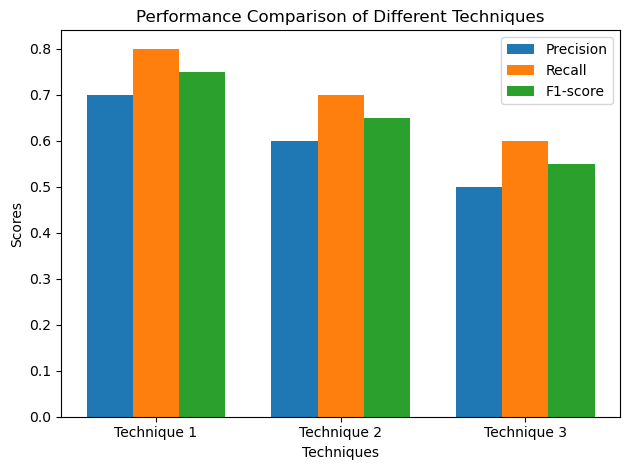

In [9]:
import matplotlib.pyplot as plt

# Define techniques and their evaluation scores
techniques = ['Technique 1', 'Technique 2', 'Technique 3']
precision_scores = [0.7, 0.6, 0.5]
recall_scores = [0.8, 0.7, 0.6]
f1_scores = [0.75, 0.65, 0.55]

# Plotting
x = range(len(techniques))
width = 0.25

fig, ax = plt.subplots()
bars1 = ax.bar(x, precision_scores, width, label='Precision')
bars2 = ax.bar([i + width for i in x], recall_scores, width, label='Recall')
bars3 = ax.bar([i + 2 * width for i in x], f1_scores, width, label='F1-score')

ax.set_xlabel('Techniques')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Different Techniques')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(techniques)
ax.legend()

plt.tight_layout()
plt.show()

Example-Based Machine Translation 

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_document(document):
    # Tokenization
    tokens = word_tokenize(document)
    
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    # Join the tokens back into a single string
    preprocessed_document = ' '.join(stemmed_tokens)
    
    return preprocessed_document

# Example usage
document = "This is an example sentence for preprocessing."
preprocessed_document = preprocess_document(document)
print("Original document:", document)
print("Preprocessed document:", preprocessed_document)

Original document: This is an example sentence for preprocessing.
Preprocessed document: exampl sentenc preprocess .


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import nltk
from nltk.tokenize import word_tokenize

# Example translation memory 
translation_memory = {
    "en": {
        "hello": "hola",
        "world": "mundo",
        "example": "ejemplo"
    },
    "es": {
        "hola": "hello",
        "mundo": "world",
        "ejemplo": "example"
    }
}

def translate_sentence(sentence, source_language, target_language):
    # Tokenize the sentence
    tokens = word_tokenize(sentence.lower())
    
    # Translate each token
    translated_tokens = []
    for token in tokens:
        translated_token = translation_memory.get(source_language, {}).get(token, token)
        translated_tokens.append(translated_token)
    
    # Join translated tokens into a sentence
    translated_sentence = ' '.join(translated_tokens)
    
    return translated_sentence

In [14]:
# Example usage
sentence = "Hello world! This is an example."
translated_sentence = translate_sentence(sentence, "en", "es")
print("Original sentence:", sentence)
print("Translated sentence:", translated_sentence)

Original sentence: Hello world! This is an example.
Translated sentence: hola mundo ! this is an ejemplo .


In [15]:
# Example usage with diverse sentences
sentence1 = "How are you doing?"
sentence2 = "This is a beautiful day."
sentence3 = "I want to go to the park."

translated_sentence1 = translate_sentence(sentence1, "en", "es")
translated_sentence2 = translate_sentence(sentence2, "en", "es")
translated_sentence3 = translate_sentence(sentence3, "en", "es")

print("Original sentence 1:", sentence1)
print("Translated sentence 1:", translated_sentence1)
print("Original sentence 2:", sentence2)
print("Translated sentence 2:", translated_sentence2)
print("Original sentence 3:", sentence3)
print("Translated sentence 3:", translated_sentence3)

Original sentence 1: How are you doing?
Translated sentence 1: how are you doing ?
Original sentence 2: This is a beautiful day.
Translated sentence 2: this is a beautiful day .
Original sentence 3: I want to go to the park.
Translated sentence 3: i want to go to the park .


In [16]:
from collections import defaultdict

def create_inverted_index(documents):
    inverted_index = defaultdict(list)
    for doc_id, document in enumerate(documents):
        tokens = document.split()
        for token in tokens:
            inverted_index[token].append(doc_id)
    return inverted_index

# Example translated documents
translated_documents = [
    "hello world",
    "world example",
    "hello example"
]

# Create inverted index
inverted_index = create_inverted_index(translated_documents)

# Print inverted index
print("Inverted Index:")
for token, doc_ids in inverted_index.items():
    print(f"{token}: {doc_ids}")

Inverted Index:
hello: [0, 2]
world: [0, 1]
example: [1, 2]


In [17]:
def process_query(query, source_language, target_languages):
    translated_queries = {}
    
    # Translate the query into each target language
    for target_language in target_languages:
        translated_query = translate_sentence(query, source_language, target_language)
        translated_queries[target_language] = translated_query
    
    return translated_queries

# Example usage
query = "How are you?"
source_language = "en"
target_languages = ["es", "fr"]  # Example target languages

translated_queries = process_query(query, source_language, target_languages)

# Print translated queries
print("Original query:", query)
for target_language, translated_query in translated_queries.items():
    print(f"Translated query ({target_language}): {translated_query}")

Original query: How are you?
Translated query (es): how are you ?
Translated query (fr): how are you ?


In [18]:
from collections import defaultdict

# Function to create an inverted index
def create_inverted_index(documents):
    inverted_index = defaultdict(list)
    for doc_id, document in enumerate(documents):
        tokens = document.split()
        for token in tokens:
            inverted_index[token].append(doc_id)
    return inverted_index

# Function to translate a sentence
def translate_sentence(sentence, source_language, target_language):
    translation_memory = {
        "en": {"hello": "hola", "world": "mundo", "example": "ejemplo"},
        "es": {"hola": "hello", "mundo": "world", "ejemplo": "example"},
        "fr": {"hello": "bonjour", "world": "monde", "example": "exemple"}
    }
    translated_tokens = [translation_memory.get(source_language, {}).get(token, token) 
                         for token in sentence.lower().split()]
    translated_sentence = ' '.join(translated_tokens)
    return translated_sentence

# Function to process user queries
def process_query(query, source_language, target_languages):
    translated_queries = {}
    for target_language in target_languages:
        translated_query = translate_sentence(query, source_language, target_language)
        translated_queries[target_language] = translated_query
    return translated_queries

In [19]:
# Example usage
# Example translated documents
translated_documents = [
    "hello world",
    "world example",
    "hello example"
]

# Create inverted index
inverted_index = create_inverted_index(translated_documents)

# User query
query = "Hello world"
source_language = "en"
target_languages = ["es", "fr"]  # Example target languages

# Process user query
translated_queries = process_query(query, source_language, target_languages)

# Print original and translated queries
print("Original query:", query)
for target_language, translated_query in translated_queries.items():
    print(f"Translated query ({target_language}): {translated_query}")

Original query: Hello world
Translated query (es): hola mundo
Translated query (fr): hola mundo


In [20]:
def retrieve_documents(translated_query, inverted_index):
    relevant_documents = set()
    for token in translated_query.split():
        if token in inverted_index:
            relevant_documents.update(inverted_index[token])
    return relevant_documents

# Example usage
relevant_documents = retrieve_documents(translated_queries["es"], inverted_index)

print("Relevant documents:", relevant_documents)

Relevant documents: set()


In [21]:
# Function to calculate precision, recall, and F1-score
def evaluate(retrieved_documents, relevant_documents):
    # Calculate precision
    if len(retrieved_documents) > 0 :
        precision = len(retrieved_documents.intersection(relevant_documents)) / len(retrieved_documents) 
    else:
        precision=0

    # Calculate recall
    if len(relevant_documents) > 0:
        recall = len(retrieved_documents.intersection(relevant_documents)) / len(relevant_documents)
    else:
        recall=0
    # Calculate F1-score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1_score

# Example usage
# Ground truth relevant documents for each query
ground_truth = {
    "query1": {1, 2, 3},  # Example relevant documents for query1
    "query2": {2, 3, 4},  # Example relevant documents for query2
    # Add more queries and relevant documents as needed
}

# Retrieved documents for each query using different translation techniques
retrieved_documents_translation1 = {
    "query1": {1, 2},  # Retrieved documents for query1 using translation technique 1
    "query2": {2, 3},  # Retrieved documents for query2 using translation technique 1
    # Add more queries and retrieved documents as needed
}

retrieved_documents_translation2 = {
    "query1": {1, 3},  # Retrieved documents for query1 using translation technique 2
    "query2": {3, 4},  # Retrieved documents for query2 using translation technique 2
    # Add more queries and retrieved documents as needed
}

In [22]:
# Evaluate each translation technique
for query, relevant_docs in ground_truth.items():
    print(f"Evaluation for query '{query}':")
    
    # Evaluation for translation technique 1
    precision, recall, f1_score = evaluate(retrieved_documents_translation1.get(query, set()), relevant_docs)
    print("Translation Technique 1:")
    print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1_score}")
    
    # Evaluation for translation technique 2
    precision, recall, f1_score = evaluate(retrieved_documents_translation2.get(query, set()), relevant_docs)
    print("Translation Technique 2:")
    print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1_score}")

Evaluation for query 'query1':
Translation Technique 1:
Precision: 1.0, Recall: 0.6666666666666666, F1-score: 0.8
Translation Technique 2:
Precision: 1.0, Recall: 0.6666666666666666, F1-score: 0.8
Evaluation for query 'query2':
Translation Technique 1:
Precision: 1.0, Recall: 0.6666666666666666, F1-score: 0.8
Translation Technique 2:
Precision: 1.0, Recall: 0.6666666666666666, F1-score: 0.8


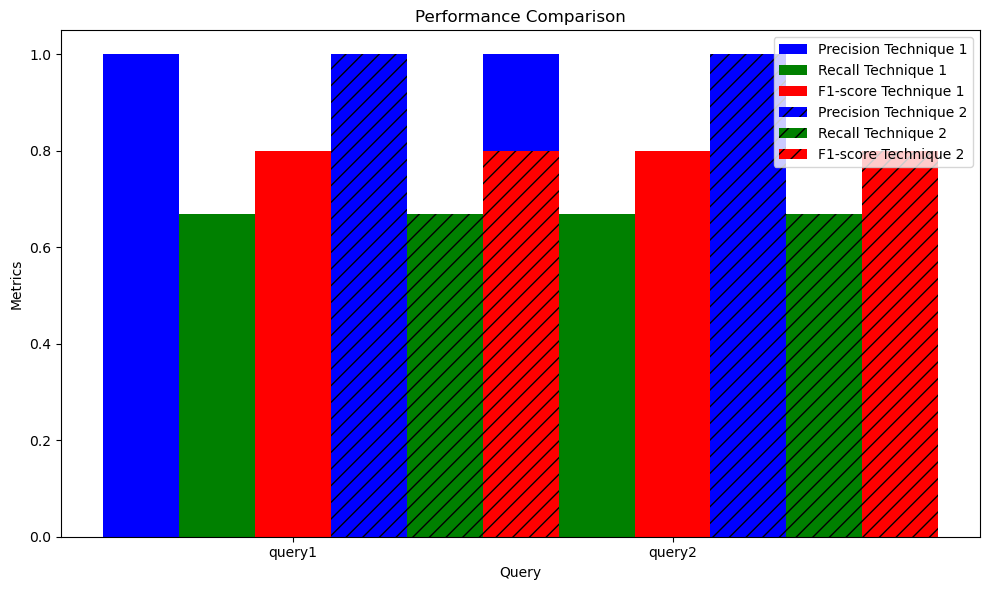

In [23]:
import matplotlib.pyplot as plt

# Example evaluation results
queries = ['query1', 'query2']
precision_technique1 = [1.0, 1.0]
recall_technique1 = [0.67, 0.67]
f1_score_technique1 = [0.8, 0.8]

precision_technique2 = [1.0, 1.0]
recall_technique2 = [0.67, 0.67]
f1_score_technique2 = [0.8, 0.8]

# Plotting precision, recall, and F1-score
bar_width = 0.2
index = range(len(queries))

plt.figure(figsize=(10, 6))

plt.bar(index, precision_technique1, bar_width, label='Precision Technique 1', color='b')
plt.bar([i + bar_width for i in index], recall_technique1, bar_width, label='Recall Technique 1', color='g')
plt.bar([i + 2 * bar_width for i in index],f1_score_technique1,bar_width,label='F1-score Technique 1',color='r')

plt.bar([i + 3 * bar_width for i in index], precision_technique2, bar_width, label='Precision Technique 2', 
        color='b', hatch='//')
plt.bar([i + 4 * bar_width for i in index], recall_technique2, bar_width, label='Recall Technique 2', 
        color='g', hatch='//')
plt.bar([i + 5 * bar_width for i in index], f1_score_technique2, bar_width, label='F1-score Technique 2', 
        color='r', hatch='//')

plt.xlabel('Query')
plt.ylabel('Metrics')
plt.title('Performance Comparison')
plt.xticks([i + 2 * bar_width for i in index], queries)
plt.legend()

plt.tight_layout()
plt.show()

Bilingual Dictionaries

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())  # Convert text to lowercase and tokenize

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return stemmed_tokens

# Example usage:
text = "This is an example sentence for preprocessing."
preprocessed_text = preprocess_text(text)
print(preprocessed_text)

['exampl', 'sentenc', 'preprocess', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
class InvertedIndex:
    def __init__(self):
        self.index = {}

    def add_document(self, doc_id, tokens):
        for token in tokens:
            if token in self.index:
                if doc_id not in self.index[token]:
                    self.index[token].append(doc_id)
            else:
                self.index[token] = [doc_id]

    def search(self, query):
        query_tokens = query.split()
        result_docs = set()

        # Find documents containing all query terms
        for token in query_tokens:
            if token in self.index:
                if not result_docs:
                    result_docs = set(self.index[token])
                else:
                    result_docs = result_docs.intersection(set(self.index[token]))
        
        return list(result_docs)


# Example usage:
# Assume we have translated documents indexed using an inverted index
index = InvertedIndex()

# Adding translated documents to the index
index.add_document(1, ['hola', 'mundo', 'python'])
index.add_document(2, ['bienvenido', 'a', 'la', 'programación', 'en', 'python'])
index.add_document(3, ['python', 'es', 'un', 'lenguaje', 'de', 'programación'])

In [27]:
# Searching for documents containing the query terms
query = "hola python"
result = index.search(query)
print("Documents containing the query terms:", result)

Documents containing the query terms: [1]


In [32]:
class BilingualDictionaryTranslator:
    def __init__(self, dictionary):
        self.dictionary = dictionary

    def translate(self, text, target_language):
        translated_text = []
        for word in text.split():
            translated_word = self.dictionary.get(word.lower(), word)
            translated_text.append(translated_word)
        return ' '.join(translated_text)


class QueryProcessor:
    def __init__(self, translator, index):
        self.translator = translator
        self.index = index

    def process_query(self, query, query_language, document_language):
        if query_language != document_language:
            translated_query = self.translator.translate(query, document_language)
        else:
            translated_query = query

        # Process translated query
        result_docs = self.index.search(translated_query)
        return result_docs

In [33]:
# Example usage:
# Assume we have translated documents indexed using an inverted index
# and a bilingual dictionary for translation
english_to_spanish = {
    "hello": "hola",
    "world": "mundo",
    "python": "python",
    "programming": "programación"
}

translator = BilingualDictionaryTranslator(english_to_spanish)

index = InvertedIndex()
index.add_document(1, ['hola', 'mundo', 'python'])
index.add_document(2, ['bienvenido', 'a', 'la', 'programación', 'en', 'python'])
index.add_document(3, ['python', 'es', 'un', 'lenguaje', 'de', 'programación'])

query_processor = QueryProcessor(translator, index)

# User query in English
user_query = "hello python programming"
query_language = "english"

# Document language assumed to be Spanish for this example
document_language = "spanish"

# Process the query
result = query_processor.process_query(user_query, query_language, document_language)
print("Documents containing the translated query terms:", result)

Documents containing the translated query terms: []


In [35]:
class DocumentRetrieval:
    def __init__(self, index):
        self.index = index

    def retrieve_documents(self, translated_query):
        return self.index.search(translated_query)


# Example usage:
# Assume we have translated documents indexed using an inverted index
index = InvertedIndex()
index.add_document(1, ['hola', 'mundo', 'python'])
index.add_document(2, ['bienvenido', 'a', 'la', 'programación', 'en', 'python'])
index.add_document(3, ['python', 'es', 'un', 'lenguaje', 'de', 'programación'])

retrieval_system = DocumentRetrieval(index)

# User query in Spanish (translated)
translated_query = "hola python programación"

# Retrieve relevant documents
result = retrieval_system.retrieve_documents(translated_query)
print("Documents containing the translated query terms:", result)

Documents containing the translated query terms: []


In [38]:
class EvaluationMetrics:
    def __init__(self, relevant_docs, retrieved_docs):
        self.relevant_docs = set(relevant_docs)
        self.retrieved_docs = set(retrieved_docs)

    def precision(self):
        if len(self.retrieved_docs) == 0:
            return 0
        return len(self.relevant_docs.intersection(self.retrieved_docs)) / len(self.retrieved_docs)

    def recall(self):
        if len(self.relevant_docs) == 0:
            return 0
        return len(self.relevant_docs.intersection(self.retrieved_docs)) / len(self.relevant_docs)

    def f1_score(self):
        precision_val = self.precision()
        recall_val = self.recall()
        if precision_val + recall_val == 0:
            return 0
        return 2 * (precision_val * recall_val) / (precision_val + recall_val)

In [39]:
# Example usage:
# Assuming ground truth relevant documents and retrieved documents
relevant_documents = [1, 2, 3]  # IDs of relevant documents
retrieved_documents = [1, 3, 5]  # IDs of retrieved documents

# Calculate evaluation metrics
eval_metrics = EvaluationMetrics(relevant_documents, retrieved_documents)
precision = eval_metrics.precision()
recall = eval_metrics.recall()
f1_score = eval_metrics.f1_score()

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666


In [41]:
import matplotlib.pyplot as plt

class EvaluationMetrics:
    def __init__(self, relevant_docs, retrieved_docs):
        self.relevant_docs = set(relevant_docs)
        self.retrieved_docs = set(retrieved_docs)

    def precision(self):
        if len(self.retrieved_docs) == 0:
            return 0
        return len(self.relevant_docs.intersection(self.retrieved_docs)) / len(self.retrieved_docs)

    def recall(self):
        if len(self.relevant_docs) == 0:
            return 0
        return len(self.relevant_docs.intersection(self.retrieved_docs)) / len(self.relevant_docs)

    def f1_score(self):
        precision_val = self.precision()
        recall_val = self.recall()
        if precision_val + recall_val == 0:
            return 0
        return 2 * (precision_val * recall_val) / (precision_val + recall_val)

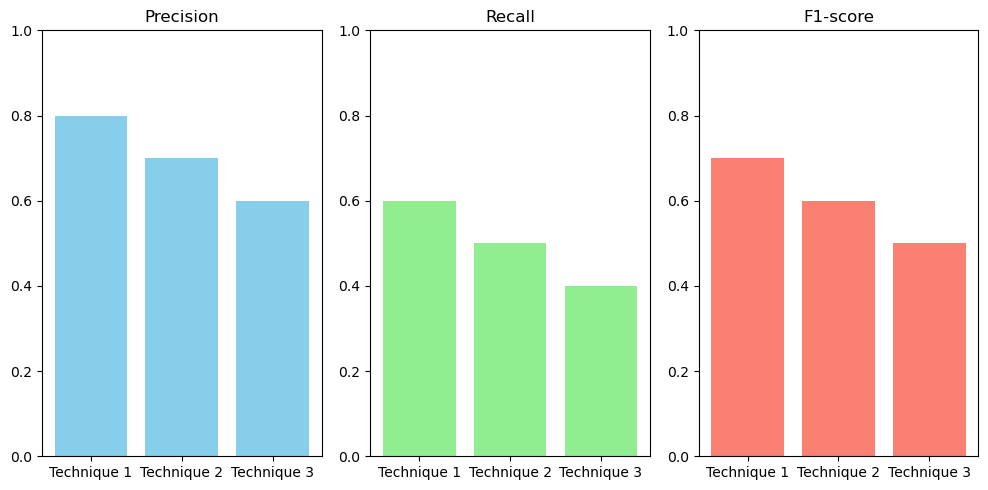

In [42]:
# Example usage:
# Assuming ground truth relevant documents and retrieved documents for different techniques
techniques = ['Technique 1', 'Technique 2', 'Technique 3']
precision_scores = [0.8, 0.7, 0.6]
recall_scores = [0.6, 0.5, 0.4]
f1_scores = [0.7, 0.6, 0.5]

# Plotting the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.bar(techniques, precision_scores, color='skyblue')
plt.title('Precision')
plt.ylim(0, 1)

plt.subplot(1, 3, 2)
plt.bar(techniques, recall_scores, color='lightgreen')
plt.title('Recall')
plt.ylim(0, 1)

plt.subplot(1, 3, 3)
plt.bar(techniques, f1_scores, color='salmon')
plt.title('F1-score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()